In [139]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
import matplotlib.colors as cl
import cartopy.crs as ccrs
import cartopy as cart
from cartopy.util import add_cyclic_point
from copy import copy  
import pandas as pd
import functools
import os
from glob import glob
import nc_time_axis
import cftime

In [202]:
def trans_z(ds,varname,depth):
    dzsoi=np.squeeze(ds['DZSOI'].values[:,:,1])[0,:] # get everything as np.ndarrays
    exice=np.squeeze(ds['EXCESS_ICE'].values[:,:,1])  
    var=np.squeeze(ds[varname].values[:,:,1])
    zsoi=np.squeeze(ds['ZSOI'].values[:,:,1])[0,:]
    zd=np.where(zsoi<=depth)[0][-1]
    exice_len=exice.shape[1] # reduce soil layer dimension
    exice_full=exice
    exice=exice[:,:zd]
    #print(exice.shape)
    dzsoi=dzsoi[:zd]

    var=var[:,:zd]
    #print(tsoi.shape)


    dzsoi=np.expand_dims(dzsoi,0) # make dzsoi 2D repeating every timeslice
    dz=np.repeat(dzsoi,exice.shape[0],axis=0)
    print(dzsoi.shape)
    ex_dz=dz+exice/917
    z=0.5-ex_dz.cumsum(axis=1) + np.repeat(np.expand_dims(np.sum(exice_full/917,axis=1),axis=1),zd,axis=1)
    #z=0.5-ex_dz.cumsum(axis=1)-np.repeat(np.expand_dims(np.sum(exice/917,axis=1),axis=1),exice_len,axis=1)
    ti=ds['time'].data

    ti=np.expand_dims(ti,1)
    t2=np.repeat(ti,zd,axis=1)
    print(t2.shape,z.shape,tsoi.shape)
    return t2, z, var 

In [123]:
flpth=glob('./subs/hist/*h0.*.nc')

In [124]:
ds= xr.open_mfdataset(flpth,decode_times=True)

In [133]:
ds['DZSOI']

<xarray.DataArray 'DZSOI' (time: 1320, levgrnd: 54, column: 2)> Size: 570kB
dask.array<where, shape=(1320, 54, 2), dtype=float32, chunksize=(12, 54, 2), chunktype=numpy.ndarray>
Coordinates:
  * levgrnd  (levgrnd) float32 216B 0.005 0.015 0.025 0.035 ... 25.3 35.3 45.3
  * time     (time) object 11kB 1910-02-01 00:00:00 ... 2020-01-01 00:00:00
Dimensions without coordinates: column
Attributes:
    long_name:  soil thickness
    units:      m

np.int64(25)

In [197]:
dzsoi=np.squeeze(ds['DZSOI'].values[:,:,1])[0,:] # get everything as np.ndarrays
exice=np.squeeze(ds['EXCESS_ICE'].values[:,:,1])
tsoi=np.squeeze(ds['TSOI'].values[:,:,1])
zsoi=np.squeeze(ds['ZSOI'].values[:,:,1])[0,:]
zd=np.where(zsoi<3)[0][-1]
exice_len=exice.shape[1] # reduce soil layer dimension
exice_full=exice
exice=exice[:,:zd]
print(exice.shape)
dzsoi=dzsoi[:zd]

tsoi=tsoi[:,:zd]
print(tsoi.shape)


dzsoi=np.expand_dims(dzsoi,0) # make dzsoi 2D repeating every timeslice
dz=np.repeat(dzsoi,exice.shape[0],axis=0)
print(dzsoi.shape)
ex_dz=dz+exice/917
z=0.5-ex_dz.cumsum(axis=1) + np.repeat(np.expand_dims(np.sum(exice_full/917,axis=1),axis=1),zd,axis=1)
#z=0.5-ex_dz.cumsum(axis=1)-np.repeat(np.expand_dims(np.sum(exice/917,axis=1),axis=1),exice_len,axis=1)
ti=ds['time'].data

ti=np.expand_dims(ti,1)
t2=np.repeat(ti,zd,axis=1)
print(t2.shape,z.shape,tsoi.shape)

(1320, 25)
(1320, 25)
(1, 25)
(1320, 25) (1320, 25) (1320, 25)


In [198]:
t2t = np.transpose(t2)
zt = np.transpose(z)
exicet = np.trnaspose(exice)
tsoit  = np.transpose(tsoi)

AttributeError: module 'numpy' has no attribute 'trnaspose'

(1, 18)
(1320, 18) (1320, 18) (1320, 25)


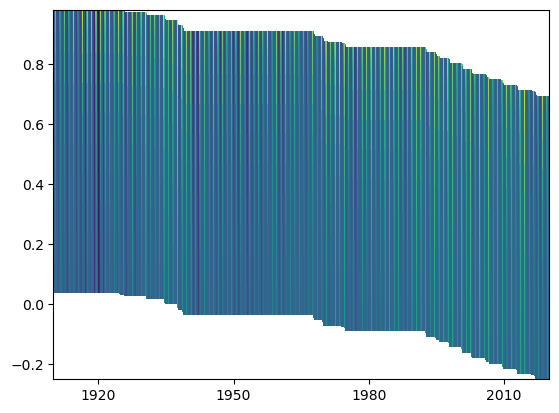

In [203]:
t2,z,tsoi = trans_z(ds,'TSOI',1)
fig, ax = plt.subplots()
ax.pcolor(t2,z,tsoi, shading='nearest')
#ax.invert_yaxis()
#ax.set_ylim(-1.0,0.7)
#ax.set_xlim(cftime.DatetimeNoLeap(1910, 1, 1, 0, 0, 0, 0, has_year_zero=True),cftime.DatetimeNoLeap(1911, 1, 1, 0, 0, 0, 0, has_year_zero=True))

In [208]:
ds1=ds.groupby('time.year').mean().compute()

In [211]:
ds1


<bound method Dataset.compute of <xarray.Dataset> Size: 2MB
Dimensions:                        (year: 111, lndgrid: 1, levgrnd: 54,
                                    column: 2, levlak: 10, levsoi: 49,
                                    gridcell: 1, landunit: 1, pft: 2, cft: 2,
                                    glc_nec: 10, levdcmp: 54, ltype: 9,
                                    natpft: 15, nvegwcs: 4)
Coordinates:
  * levgrnd                        (levgrnd) float32 216B 0.005 0.015 ... 45.3
  * levsoi                         (levsoi) float32 196B 0.005 0.015 ... 9.85
  * levlak                         (levlak) float32 40B 0.05 0.6 ... 34.33 44.78
  * levdcmp                        (levdcmp) float32 216B 0.005 0.015 ... 45.3
  * year                           (year) int64 888B 1910 1911 ... 2019 2020
Dimensions without coordinates: lndgrid, column, gridcell, landunit, pft, cft,
                                glc_nec, ltype, natpft, nvegwcs
Data variables: (12/543)
    mcdate  